# principal component analysis

**What I've accomplished through PCA:**
- Preprocessed and transformed the CSV file of methylation signal and pdetection values for gene set (transposed for PCA)
- df (complete data) subindexed into smaller dataframes (primary, recurent, meth, unmeth)
- these dataframes can each be run through the PCA algorithm for dimensionality reduction on specific subsets

**Interpretations:**
- Total df visualizes two distinct clusters on the left and right
- Separation into primary and recurrent subsets does not significantly alter this result, but separation by methylation does
- Further analysis by indexing the datasets shows that the left cluster is unmethylated and right cluster is methylated data


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



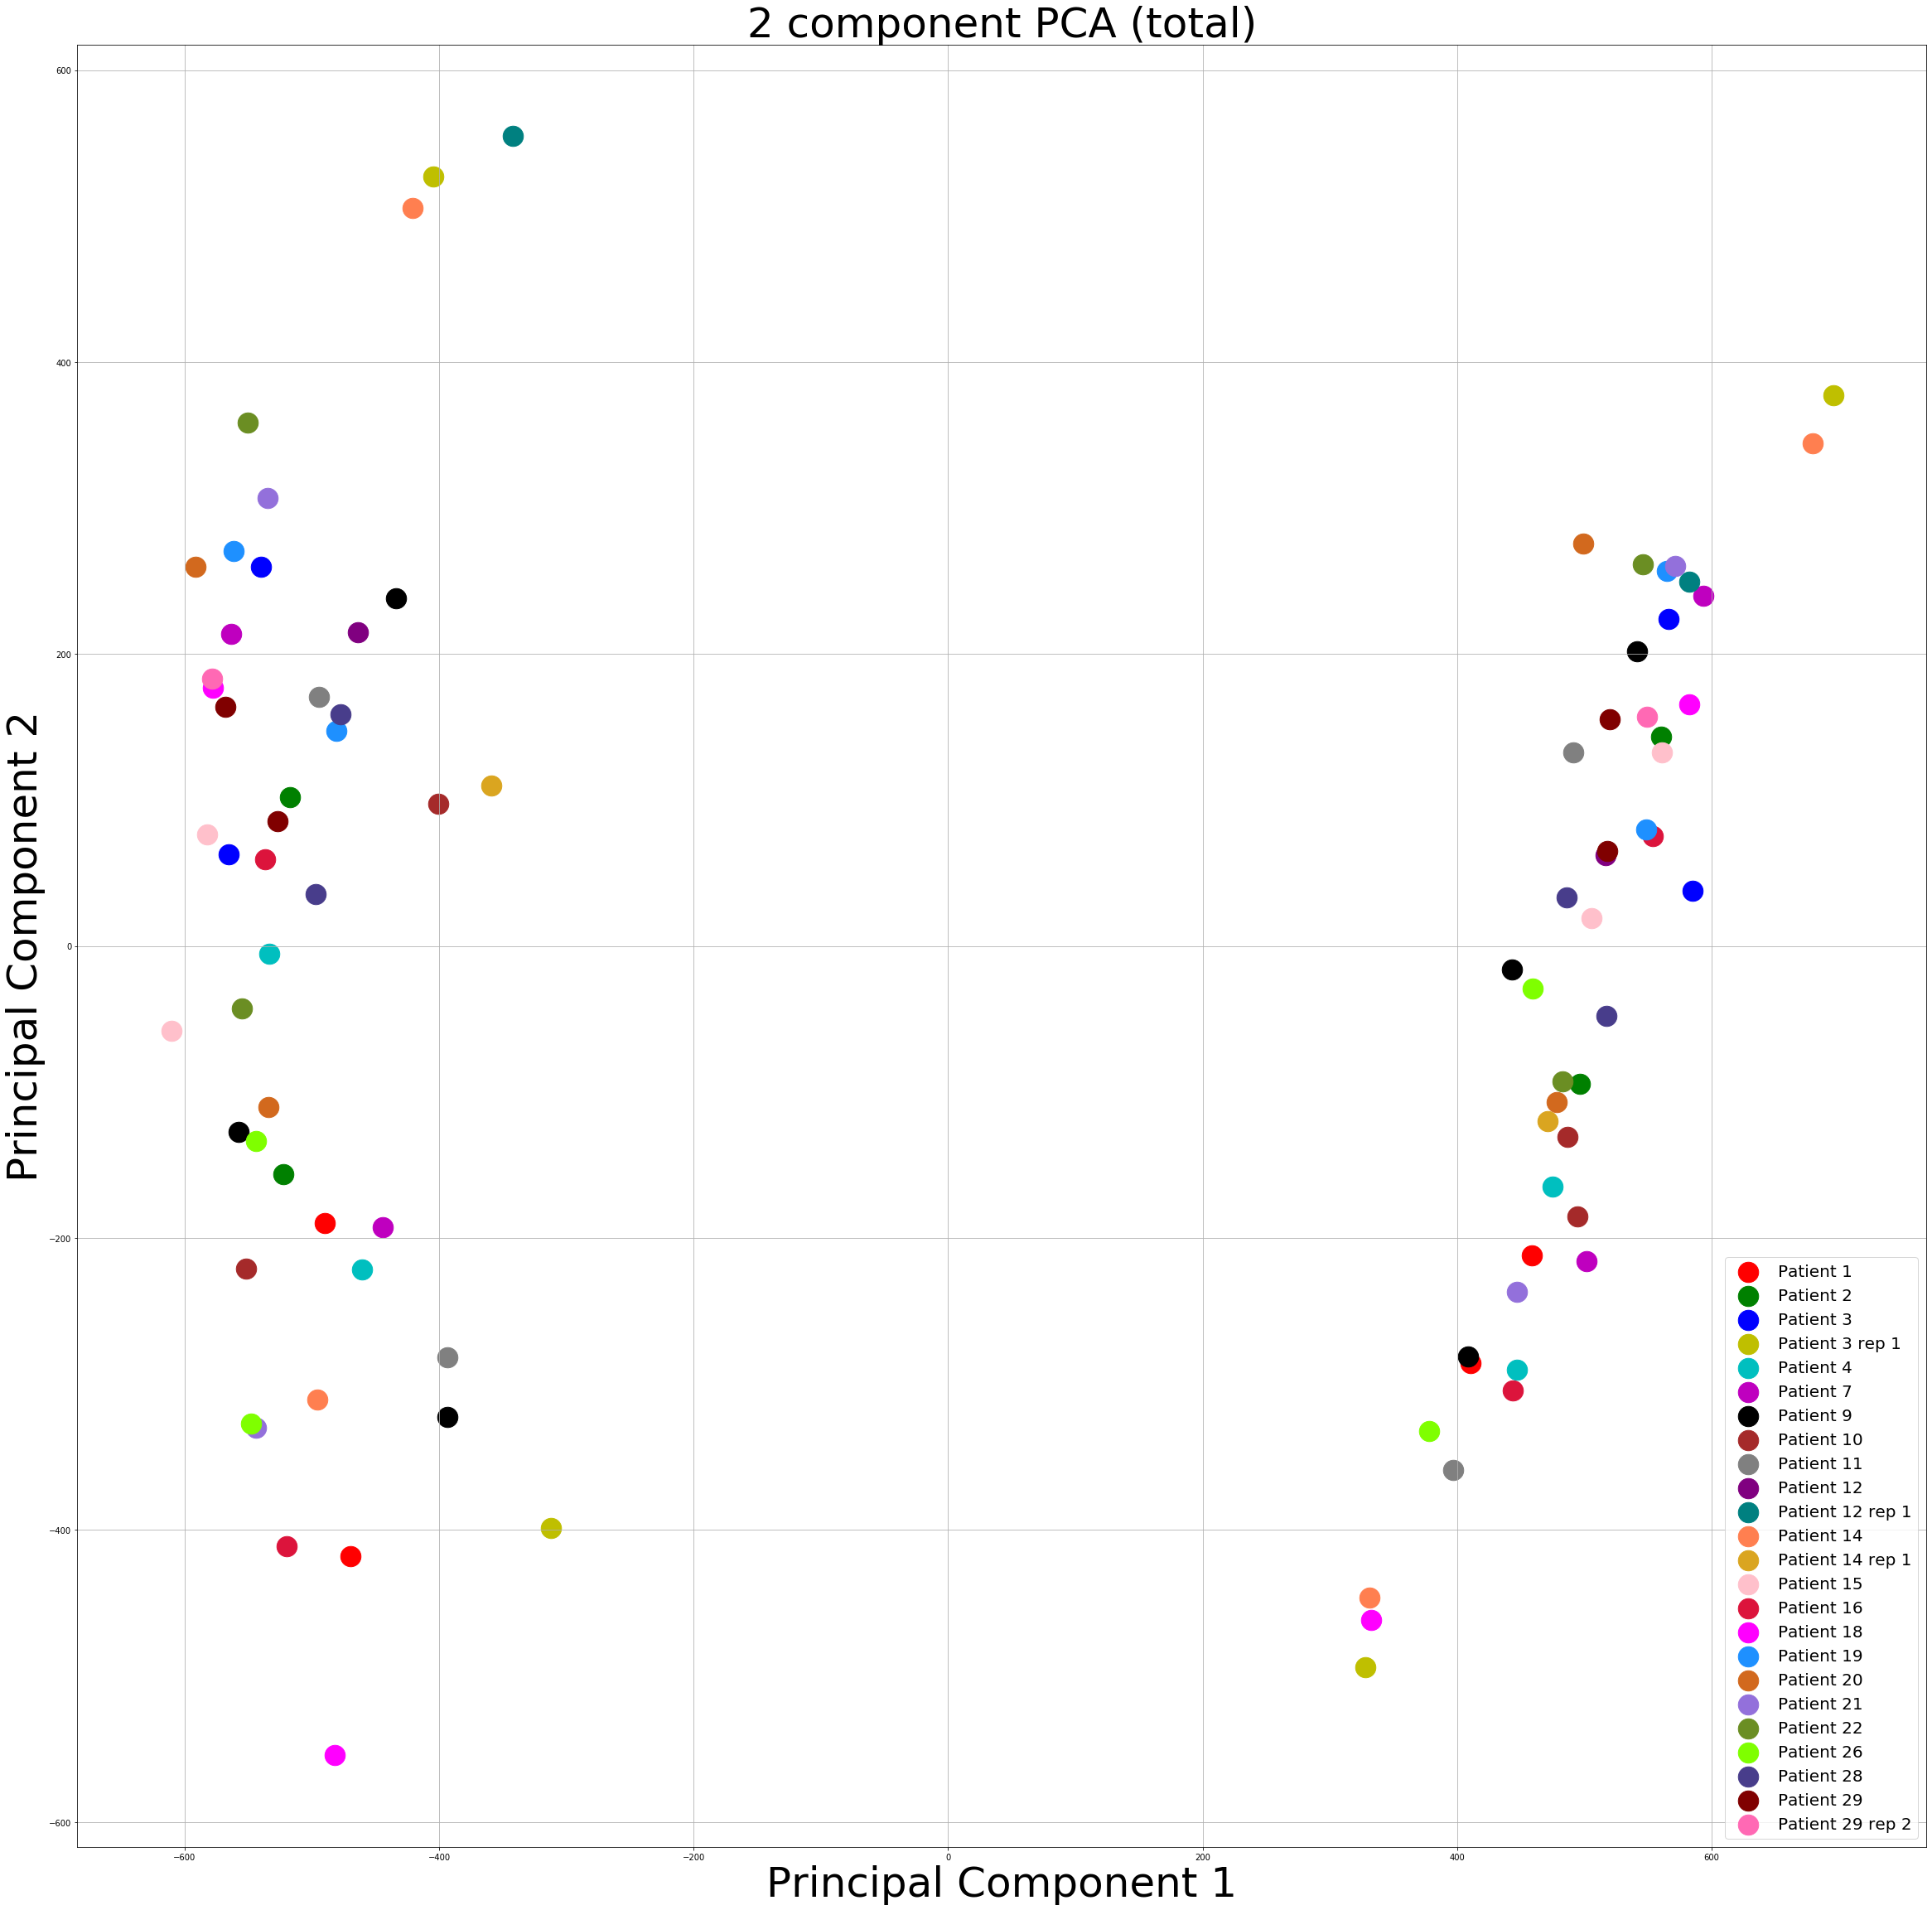

In [109]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#loading df
file = 'C:/Users/{kr.pA}/Downloads/methylated data/modified.csv'
df = pd.read_csv(file, sep = ',')

#editing df to desired format
df = df.transpose()

#log transform
a = df.iloc[0:1]

b = df.iloc[1:]
b = b.astype(float)
b = b.transform(np.log)

df = pd.concat([a, b])

#inserting patient numbers
df.insert(416349, 416349, ['Patient Number','Patient 3 rep 1', 'Patient 3 rep 1','Patient 3 rep 1','Patient 3 rep 1','Patient 9','Patient 9','Patient 9','Patient 9','Patient 10','Patient 10',
             'Patient 11','Patient 11','Patient 11','Patient 11','Patient 12 rep 1','Patient 12 rep 1','Patient 14','Patient 14','Patient 14 rep 1','Patient 14 rep 1',
             'Patient 1','Patient 1','Patient 1','Patient 1','Patient 2','Patient 2','Patient 2','Patient 2','Patient 3','Patient 3',
             'Patient 3', 'Patient 3','Patient 4', 'Patient 4','Patient 4', 'Patient 4','Patient 7','Patient 7','Patient 7','Patient 7',
             'Patient 8','Patient 8','Patient 8','Patient 8','Patient 9','Patient 9','Patient 10','Patient 10','Patient 12','Patient 12',
             'Patient 14','Patient 14','Patient 15','Patient 15','Patient 15','Patient 15','Patient 16','Patient 16','Patient 16','Patient 16',
             'Patient 18','Patient 18','Patient 18','Patient 18','Patient 19','Patient 19','Patient 19','Patient 19','Patient 20','Patient 20',
             'Patient 20','Patient 20','Patient 21','Patient 21','Patient 21','Patient 21','Patient 22','Patient 22','Patient 22','Patient 22',
             'Patient 26','Patient 26','Patient 26','Patient 26','Patient 28','Patient 28','Patient 28','Patient 28','Patient 29','Patient 29',
             'Patient 29','Patient 29','Patient 29 rep 2','Patient 29 rep 2'], True) 

#populating a list of the genes and the patient number heading to rename the columns and initialize features list
genelist = list(df.iloc[0,0:])

features = genelist[:-1]
df.columns = genelist

print(genelist)

df = df.drop(['ID_REF'], axis = 0)


#***SEPARATING PRIMARY VS RECURRENT***

missing = df.iloc[10:16]

#recur1 = unmeth
#recur2 = meth
#prim1 = unmeth
#prim2 = meth

recurmissing = missing.iloc[2:]

#recurrent

recur1 = df.iloc[3::4]
recur1 = recur1.drop("Patient 11_primary tumour Unmethylated signal")

recur1 = pd.concat([recur1, recurmissing.iloc[1::2]])

recur2 = df.iloc[2::4]
recur2 = recur2.drop("Patient 11_primary tumour Methylated signal")


s = df.iloc[-1:]
recur1 = pd.concat([recur1, s])

xs = df.iloc[-2:-1]
recur2= pd.concat([recur2, xs])
recur2= pd.concat([recur2, recurmissing.iloc[::2]])


#primary

prim1 = df.iloc[1::4]
prim1 = prim1.drop("Patient 11_recurrent tumour Unmethylated signal")
prim1 = prim1.drop("Patient 12_recurrent tumour Unmethylated signal")
prim1 = prim1.drop("Patient 29_recurrent tumour_2 Unmethylated signal")

prim1 = pd.concat([prim1, missing.iloc[1:2]])

prim2 = df.iloc[::4]
prim2 = prim2.drop("Patient 11_recurrent tumour Methylated signal")
prim2 = prim2.drop("Patient 12_recurrent tumour Methylated signal")
prim2 = prim2.drop("Patient 29_recurrent tumour_2 Methylated signal")

prim2= pd.concat([prim2,missing.iloc[0:1]])

#final indexed dataframes for the primary and recurrent data (separated by meth and unmeth within)

primary = pd.concat([prim1,prim2])   
recurrent = pd.concat([recur1, recur2])
meth = df.iloc[::2]
unmeth = df.iloc[1::2]

# Currently for transformed primary tumor data (can change to df, recurrent, meth or unmeth for full or recurrent data only)
# Separating out the features
x = df.loc[:, features].values

# Separating out the target (patient # vals)
y = df.loc[:,['Patient Number']].values
#print("Patient Number equals \n", y)

# Standardizing the features
x = StandardScaler().fit_transform(x)

#PCA starts here ***

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Extract the patient number column
df_Patient_Number = df[['Patient Number']]

# Copy the index from principalDf to df_Patient_Number.
# If we don't do this, the pd.concat() will not know which row to match against which.
# So, it will end up doubling the final output, with nonsense (NaN) data all over the place.
df_Patient_Number.index = principalDf.index

finalDf = pd.concat([principalDf, df_Patient_Number], axis = 1)
#finalDf = finalDf.transform(lambda x: np.log10(x))

# visualizing the data in 2d

fig = plt.figure(figsize = (40,40))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 50)
ax.set_ylabel('Principal Component 2', fontsize = 50)
ax.set_title('2 component PCA (total)', fontsize = 50)

patients = ['Patient 1','Patient 2','Patient 3','Patient 3 rep 1','Patient 4','Patient 7','Patient 9','Patient 10','Patient 11','Patient 12','Patient 12 rep 1','Patient 14','Patient 14 rep 1','Patient 15','Patient 16','Patient 18','Patient 19','Patient 20','Patient 21','Patient 22','Patient 26','Patient 28','Patient 29', 'Patient 29 rep 2']
colors = ['r', 'g','b','y','c','m','k','brown','gray','purple','teal','coral','goldenrod','pink','crimson','fuchsia','dodgerblue','chocolate','mediumpurple','olivedrab','chartreuse','darkslateblue','maroon','hotpink']


for patient, color in zip(patients,colors):
    indicesToKeep = finalDf['Patient Number'] == patient
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 600)
ax.legend(patients, fontsize = 20)
ax.grid()


# KMeans clustering

**What I have accomplished through kmeans algorithm:**
- Using PCA values from previous cell to generate distance-minimizing clusters through sklearn 
- Can change the # of clusters (currently set to 4) (each has own color)
- Calculated coordinates and plotted centroids of each of the clusters 
- Used dataframe indexing to determine that leftside cluster is unmethylated data and right cluster is methylated

**Interpretations:**
- strong positive linear correlation in the cluster plot of the methylated data
- no such correlation in unmethylated data
- methylated data has a large variance in the 1st component dimension, but very small variance in the 2nd component dimension
- unmethylated data has lots of variance in both directions
- methylation likely has a greater correlation with DNA signal values 


1906646.213235193
[[ 548.8191571   146.00199509]
 [-507.42709448  197.6400179 ]
 [ 435.21594793 -253.40184835]
 [-496.21477705 -253.01796027]]
4
[2 3 0 1 0 1 2 3 2 1 2 3 0 1 0 1 0 1 2 1 2 3 2 3 2 3 0 1 0 1 0 1 2 3 2 1 0
 1 2 3 0 1 0 1 0 3 2 3 0 1 2 3 0 3 0 1 2 3 0 1 0 1 2 3 0 1 0 1 0 1 2 3 2 3
 0 1 0 1 2 3 0 3 2 3 0 1 0 1 0 1 0 1 0 1]


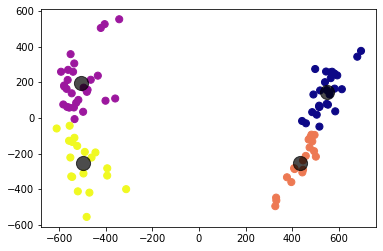

In [132]:
from sklearn.cluster import KMeans

pcaDf = finalDf.drop("Patient Number", axis=1) 
pcaDf

kmeans = KMeans(init="k-means++", n_clusters = 4, n_init=10, max_iter=300)
kmeans.fit(pcaDf)
y_kmeans = kmeans.predict(pcaDf)


# The lowest SSE value (sum of squared errors of distances to centroid after convergence)
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)
#kmeans cluster assignments in nparray
print(kmeans.labels_)



#visualize kmeans
plt.scatter(pcaDf["principal component 1"], pcaDf["principal component 2"], c=y_kmeans, s=50, cmap='plasma')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.7)



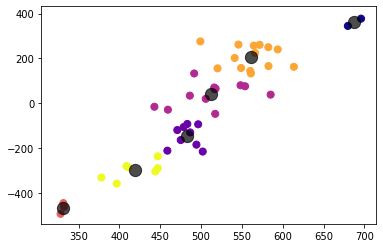

In [135]:
#methylated clusters

meth = pcaDf.iloc[::2]

kmeans = KMeans(init="k-means++", n_clusters = 6, n_init=10, max_iter=300)
kmeans.fit(meth)
y_kmeans = kmeans.predict(meth)


#visualize kmeans
plt.scatter(meth["principal component 1"], meth["principal component 2"], c=y_kmeans, s=50, cmap='plasma')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=150, alpha=0.7)

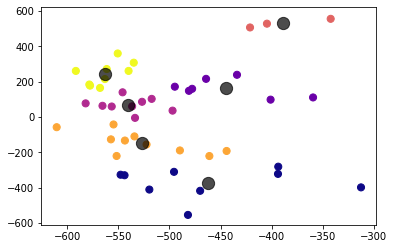

In [144]:
#unmethylated clusters

unmeth = pcaDf.iloc[1::2]

kmeans = KMeans(init="k-means++", n_clusters = 6, n_init=10, max_iter=300)
kmeans.fit(unmeth)
y_kmeans = kmeans.predict(unmeth)


#visualize kmeans
plt.scatter(unmeth["principal component 1"], unmeth["principal component 2"], c=y_kmeans, s=50, cmap='plasma')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=150, alpha=0.7)